In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'tele_churn_1.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* Here we dont have any missing value 

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Here we can see that 75% users tenure is less than 55 month 
* And 75% users bill is less than 89$

<Axes: xlabel='Churn'>

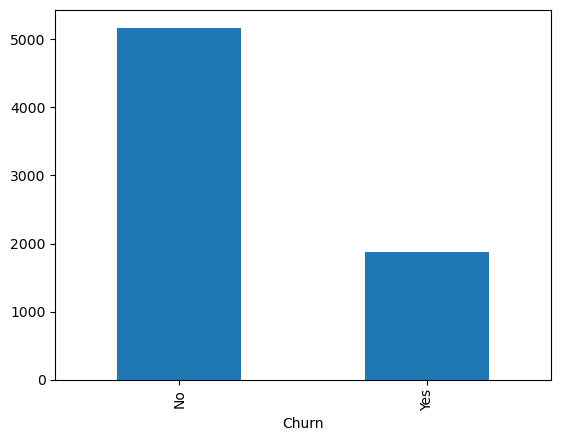

In [8]:
df['Churn'].value_counts().plot(kind='bar')

In [9]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

* Data is highly imbalnced  Here 73% of customers are not churning while 27% customers are churned

# Data Cleaning
**1.** Creating a copy of a base data for MAnipulation and processing

In [10]:
df_c = df.copy()

**2.** Total charges should be numeric amount so , lets convert it to a Numerical type
* before converting its data type we need to convert it to to numeric because its possible if it have string value that will through error 

In [11]:
df_c.TotalCharges = pd.to_numeric(df_c.TotalCharges,errors='coerce')

In [12]:
df_c.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df_c[df_c['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**3.**  **Missing Value Treatment** 
* Since the % of these records are very low as comared to the total dataset, It is dafe to remove thse Null values 

In [14]:
# Remove missing value
df_c.dropna(how='any',inplace=True)

In [15]:
df_c.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**4.** Dividing the customers into bins based on tenure i.e. - for tenure <12 : assign tenure group if 1-12, for tenure between 1 to 2 yrs , tenure group of 13-24 and so on

In [16]:
labels = ['{0} - {1}'.format(i,i+1) for i in range(1,72,12)]
labels

['1 - 2', '13 - 14', '25 - 26', '37 - 38', '49 - 50', '61 - 62']

In [17]:
# Group the tenure  in the bins
df_c['tenure_group'] = pd.cut(df_c.tenure,range(1,80,12),right=False,labels=labels)

In [18]:
df_c['tenure_group']

0         1 - 2
1       25 - 26
2         1 - 2
3       37 - 38
4         1 - 2
         ...   
7038    13 - 14
7039    61 - 62
7040      1 - 2
7041      1 - 2
7042    61 - 62
Name: tenure_group, Length: 7032, dtype: category
Categories (6, object): ['1 - 2' < '13 - 14' < '25 - 26' < '37 - 38' < '49 - 50' < '61 - 62']

**5.** Removing columns that are not required

In [19]:
df_c.drop(columns=['customerID','tenure'],axis=1,inplace=True)
df_c.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 2
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 26
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 2
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 38
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 2


# Data Exploration
**1.** Plot Distribution of individual predictors by Churn

## Unvariate Analysis

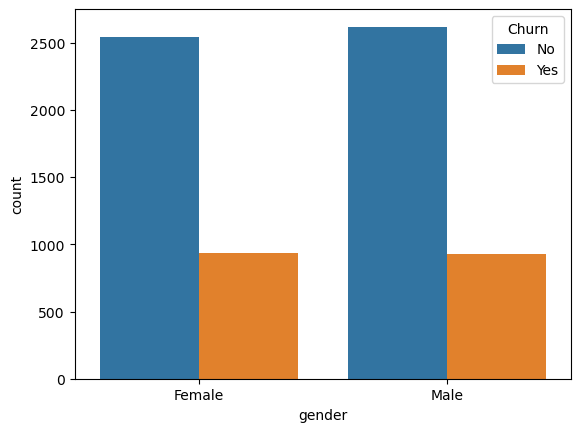

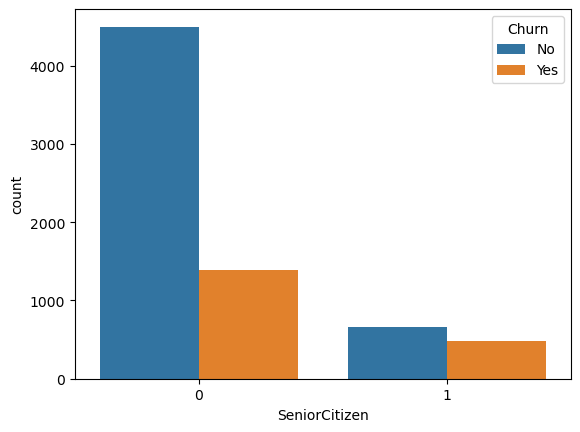

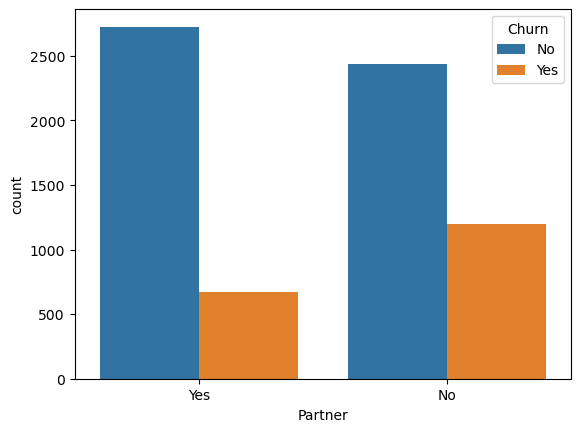

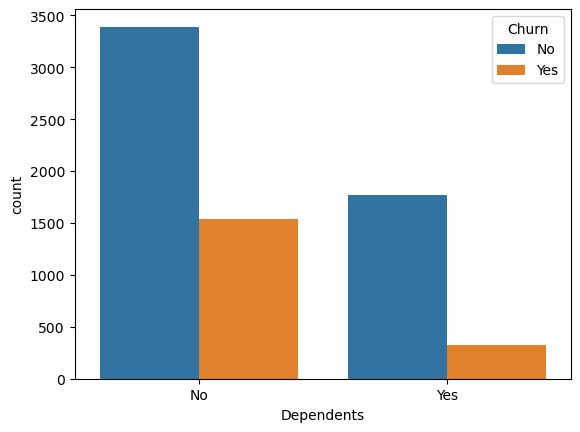

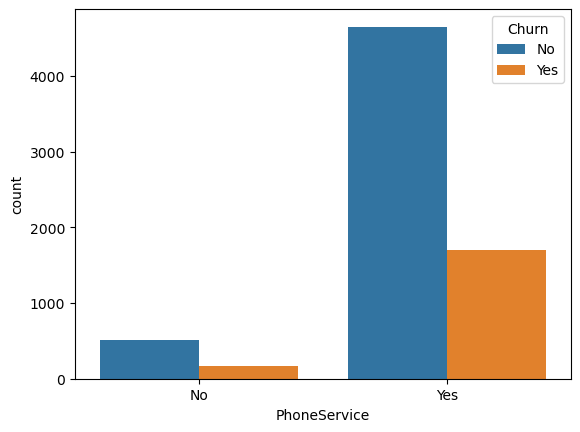

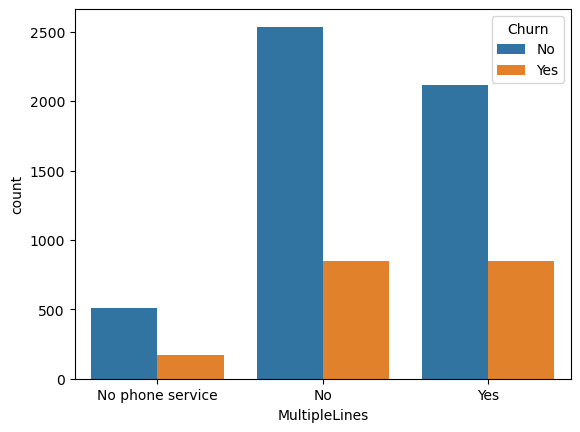

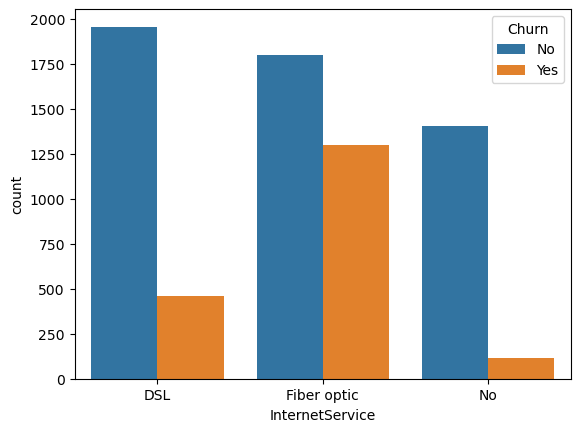

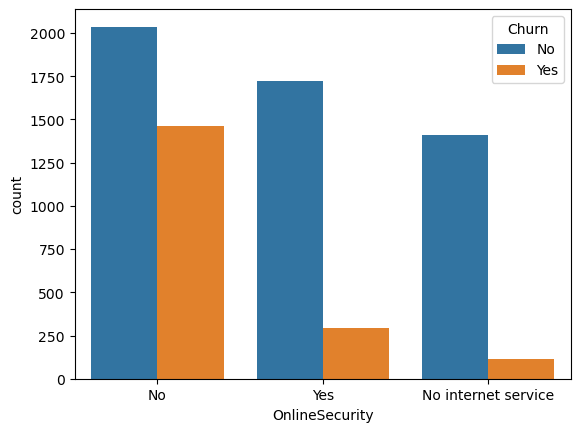

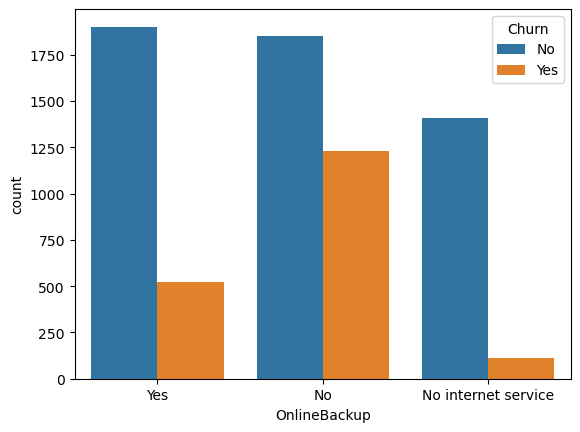

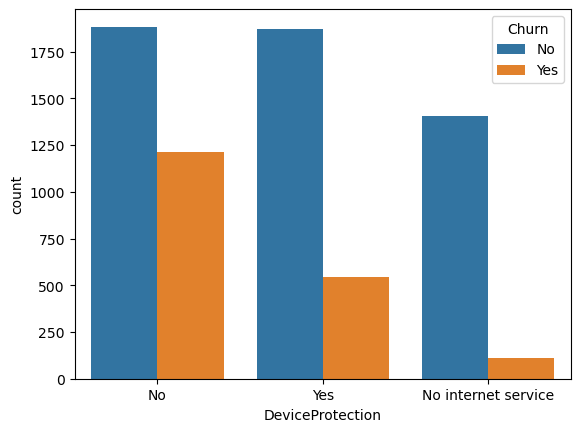

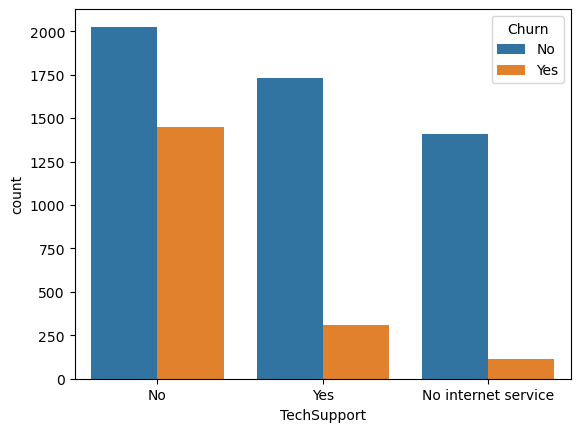

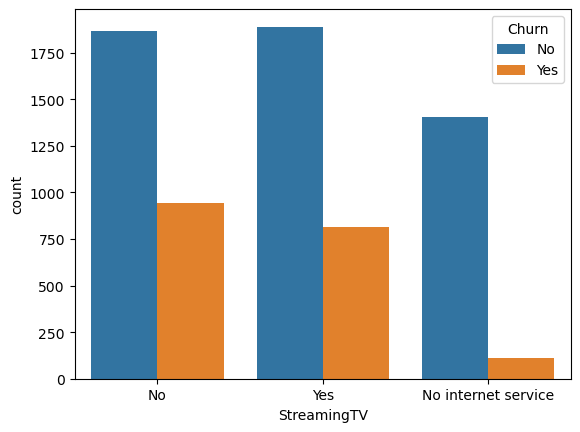

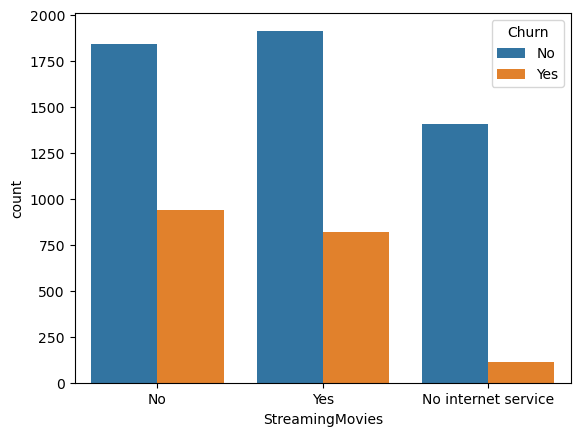

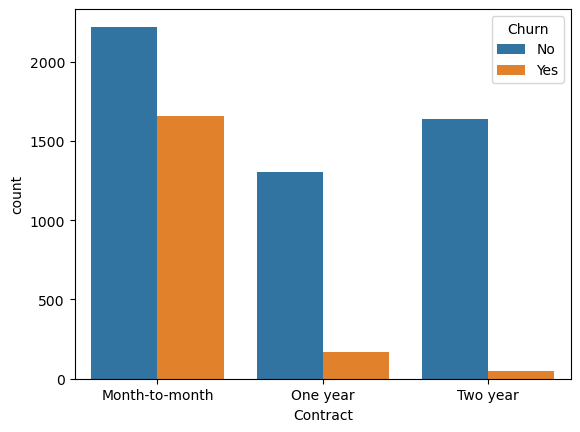

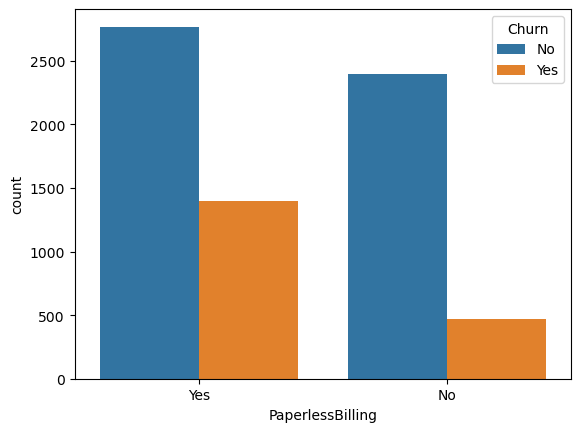

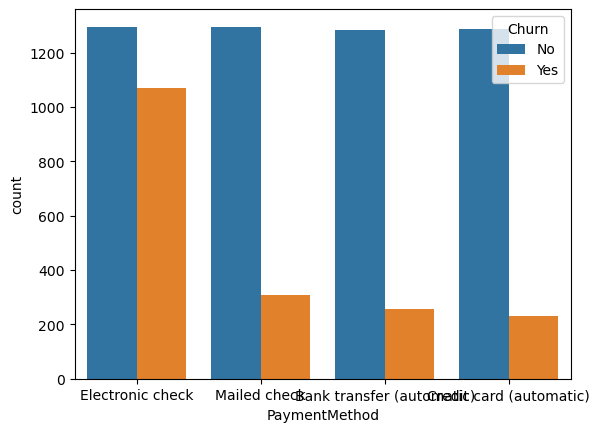

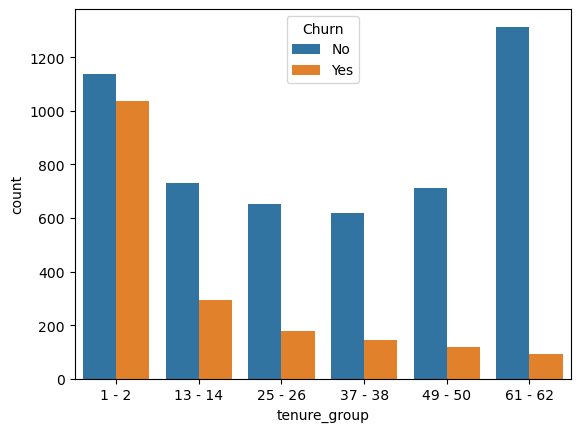

In [20]:
# Python
for i, predictor in enumerate(df_c.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns):
    plt.figure(i)
    sns.countplot(data=df_c, x=predictor, hue='Churn')

**2.** Converting target variable 'Churn' into a binary numeric variable i.e.  Yes=1, No=0

In [21]:
df_c['Churn'] = np.where(df_c.Churn=='Yes',1,0)

In [22]:
df_c.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 2
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 26
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 2
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 38
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 2


**3.** Convert all the categorical variables into dummy variables

In [23]:
df_c_dumies = pd.get_dummies(df_c,dtype=int)
df_c_dumies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 2,tenure_group_13 - 14,tenure_group_25 - 26,tenure_group_37 - 38,tenure_group_49 - 50,tenure_group_61 - 62
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**6.** Relationship between  Monthly Charges and total Charges

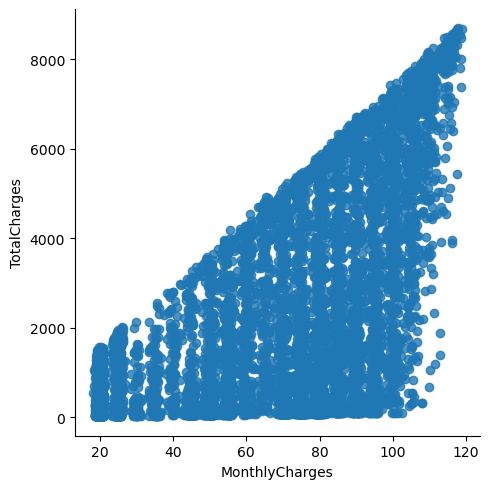

In [24]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',fit_reg=False,data=df_c_dumies)

* Here we can see that Monthly charges and Total charges are highly correlated 

Text(0.5, 1.0, 'Monthly cahrges by Churn')

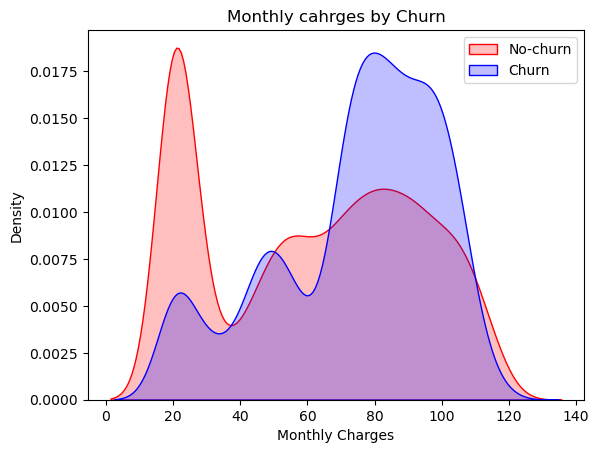

In [25]:

sns.kdeplot(
    data=df_c_dumies[df_c_dumies['Churn'] == 0],
    x='MonthlyCharges',
    color='Red',
    fill=True
)
sns.kdeplot(
    data=df_c_dumies[df_c_dumies['Churn'] == 1],
    x='MonthlyCharges',
    color='Blue',
    fill=True
)

plt.legend(['No-churn','Churn'],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Monthly cahrges by Churn')

**Insights from Plot** - Churn rate is high when monthly charges is high (70-110)

Text(0.5, 1.0, 'TotalCharges charges by Churn')

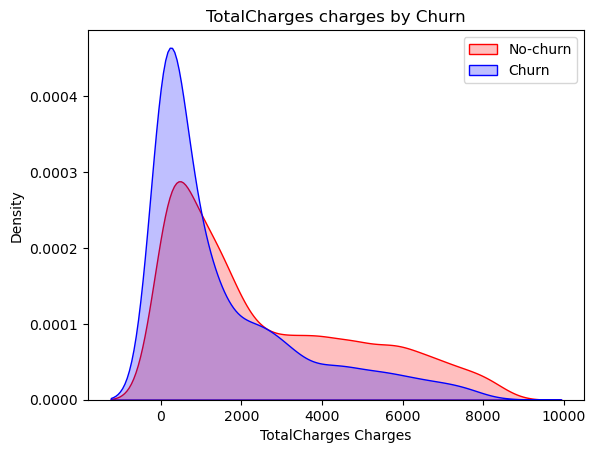

In [26]:

sns.kdeplot(
    data=df_c_dumies[df_c_dumies['Churn'] == 0],
    x='TotalCharges',
    color='Red',
    fill=True
)
sns.kdeplot(
    data=df_c_dumies[df_c_dumies['Churn'] == 1],
    x='TotalCharges',
    color='Blue',
    fill=True
)

plt.legend(['No-churn','Churn'],loc='upper right')
plt.ylabel('Density')
plt.xlabel('TotalCharges Charges')
plt.title('TotalCharges charges by Churn')

**Insights from Plot** - Churn rate is high when total charges is around (500-1500)

**7.** Build a corelation of all predictors with Churn

<Axes: >

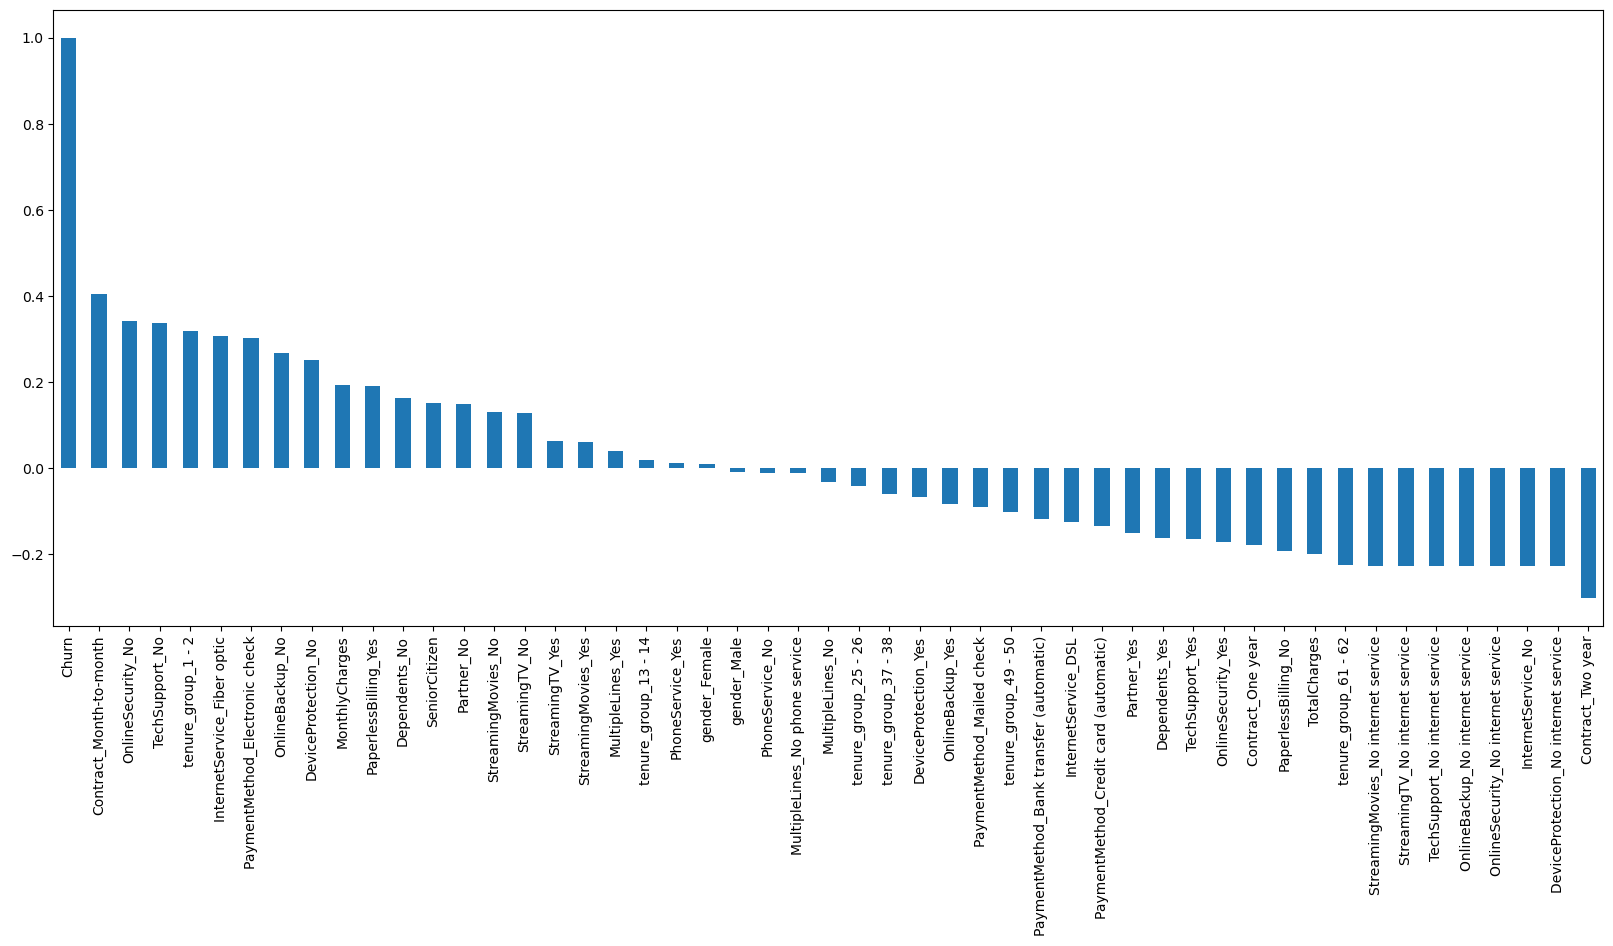

In [33]:
plt.figure(figsize=(20,8))
df_c_dumies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**Derived Insight**

**High** Churn seen in case of **Month to Month contracts,No online security, No Tech Support, First year subscription and Fibre Optics Internet . LOW Churn is seen in case of  Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years **
Factors like **Gender, Availability of PhoneService and of multiple lines have almost NO imapct on Churn rate**,

<Axes: >

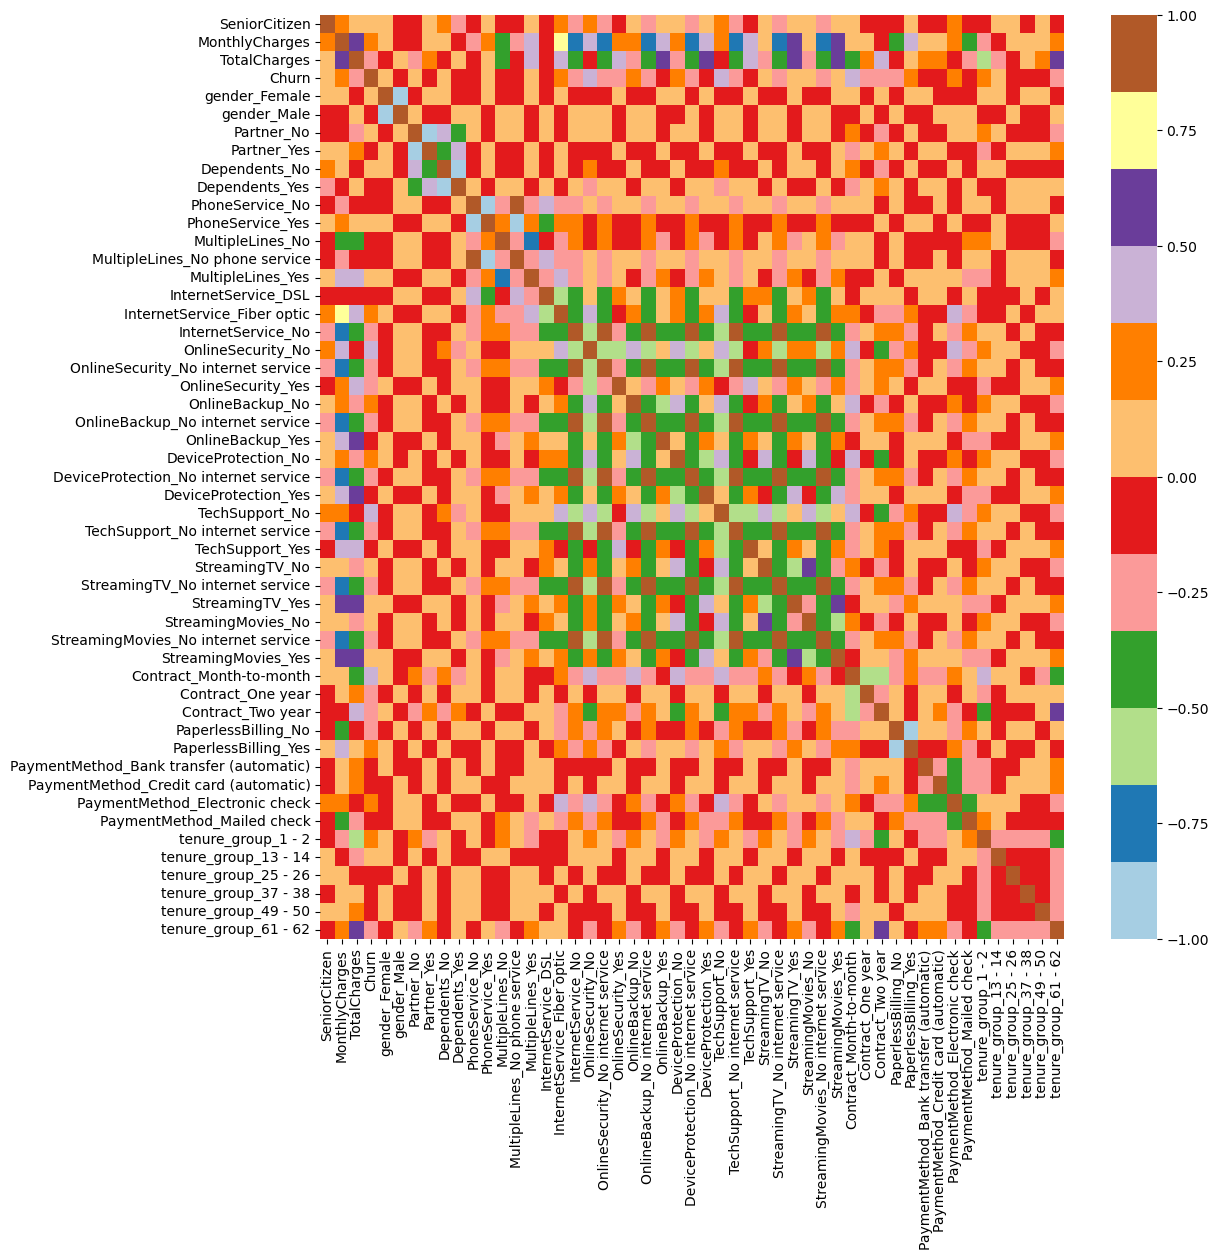

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df_c_dumies.corr(),cmap='Paired')

## Bivariate Ananlysis

In [35]:
new_df0 = df_c.loc[df_c['Churn']==0]
new_df1 = df_c.loc[df_c['Churn']==1]

In [41]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data=hue)
    fig,ax = plt.subplots()
    width = len(df[col].unique())  + 7 +4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    # plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

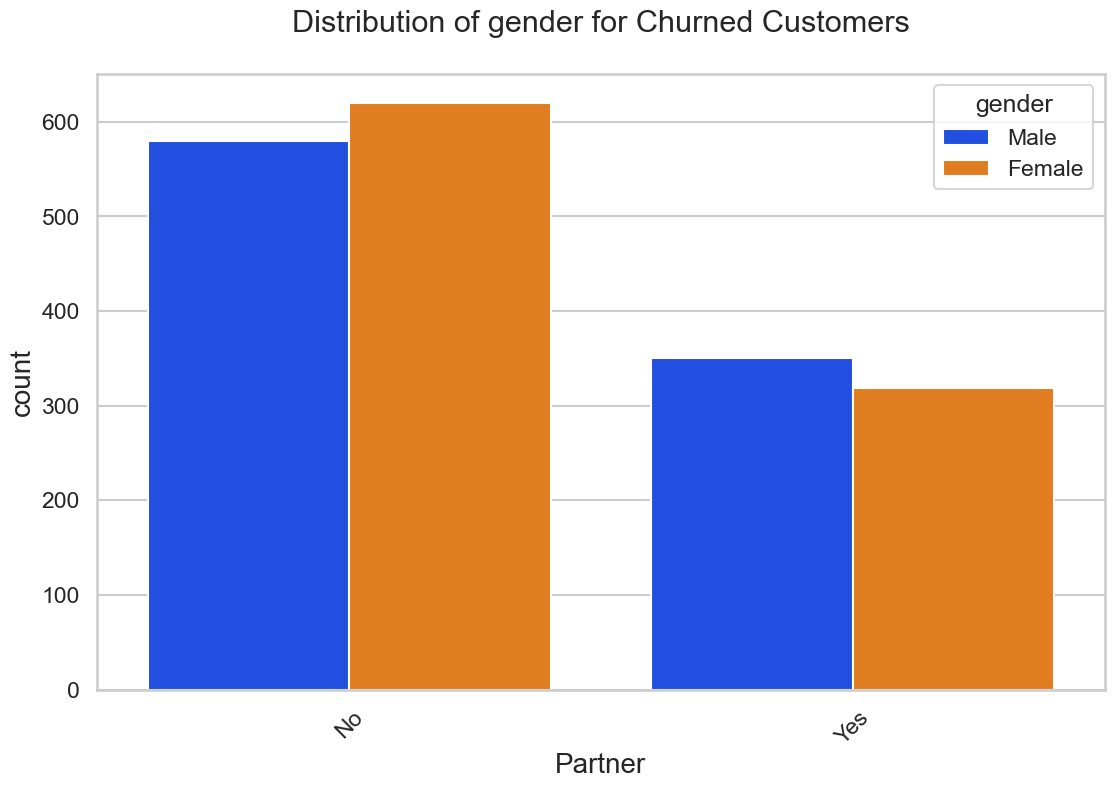

In [42]:
uniplot(new_df1,'Partner','Distribution of gender for Churned Customers','gender')

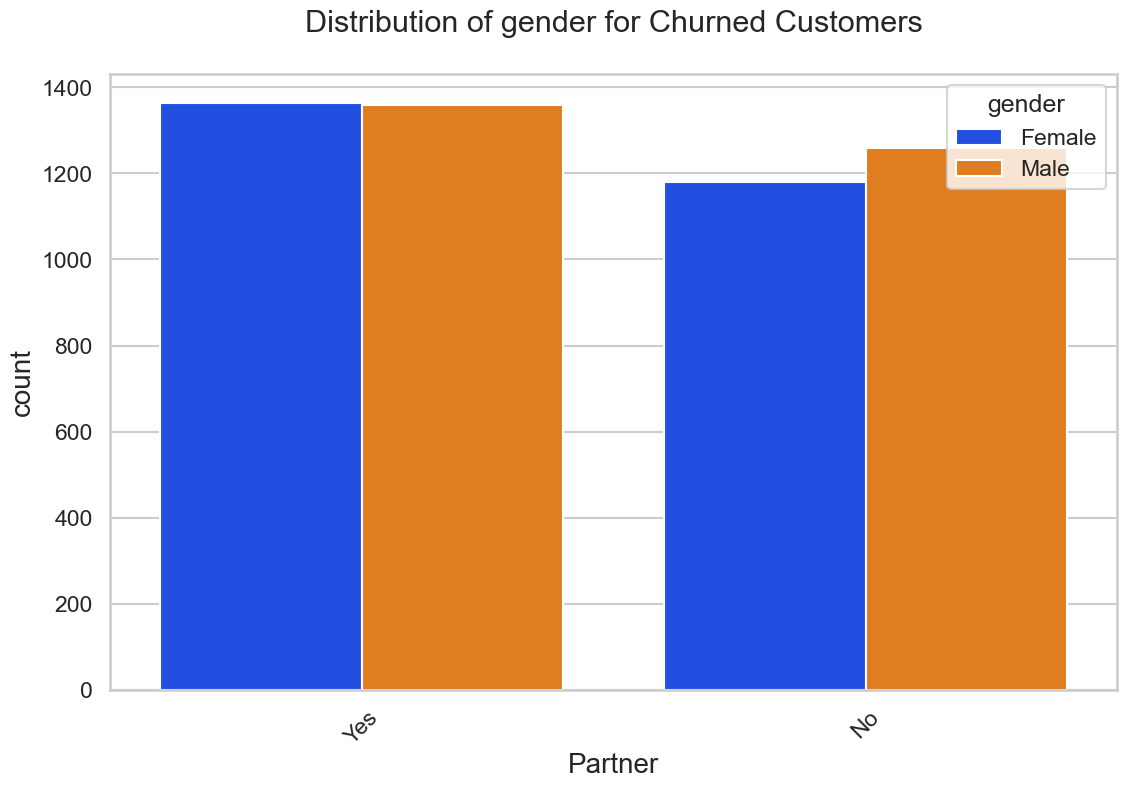

In [43]:
uniplot(new_df0,'Partner','Distribution of gender for Churned Customers','gender')

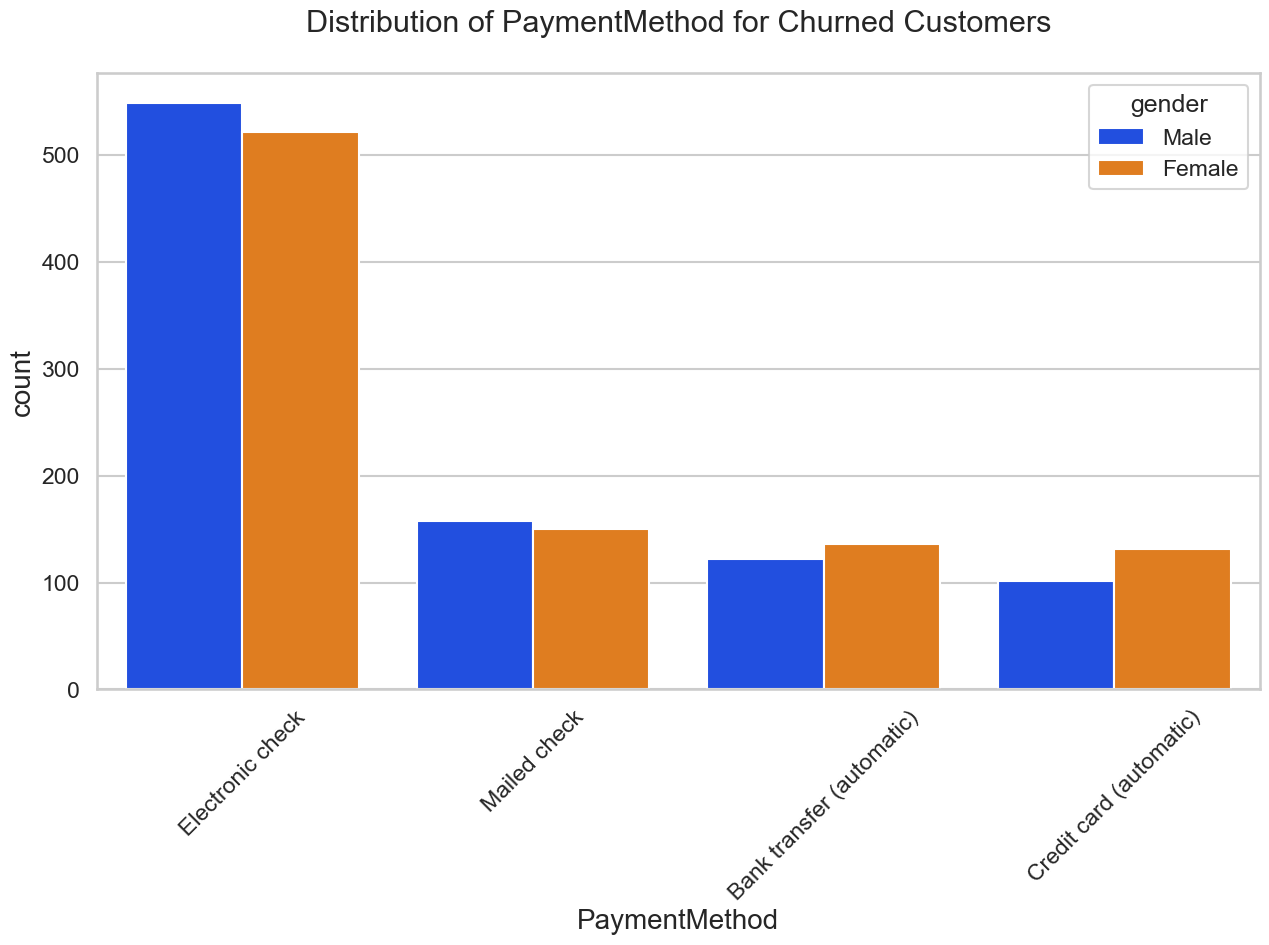

In [44]:
uniplot(new_df1,'PaymentMethod','Distribution of PaymentMethod for Churned Customers','gender')

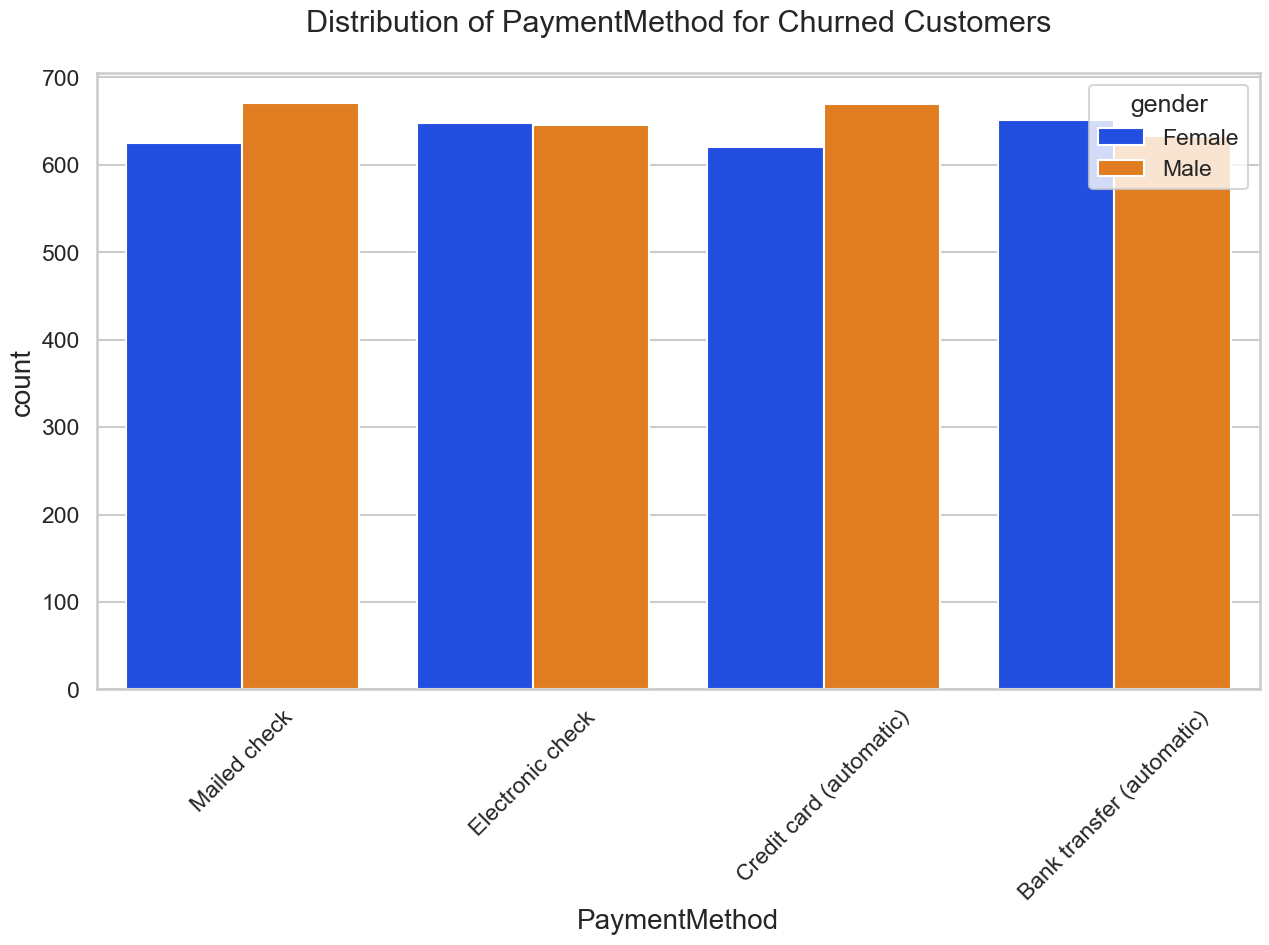

In [45]:
uniplot(new_df0,'PaymentMethod','Distribution of PaymentMethod for Churned Customers','gender')

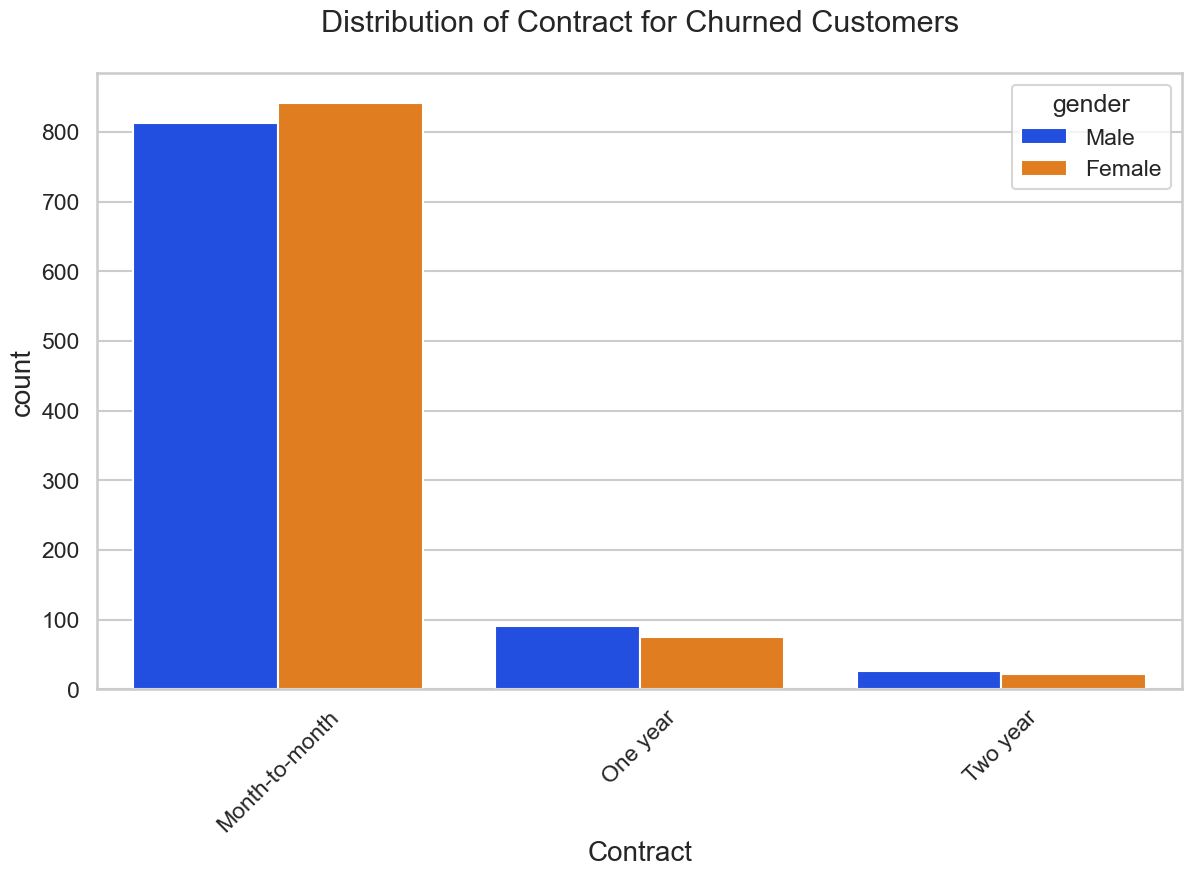

In [46]:
uniplot(new_df1,'Contract','Distribution of Contract for Churned Customers','gender')

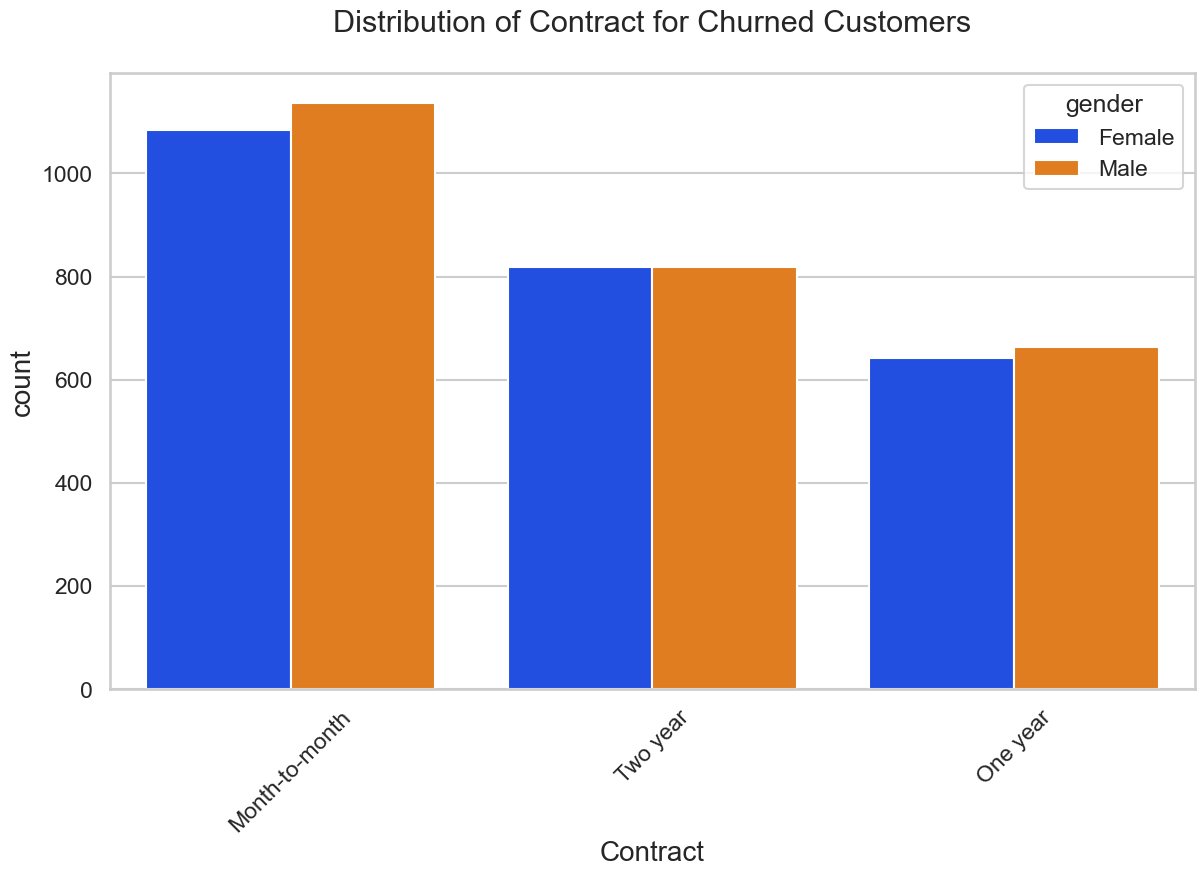

In [47]:
uniplot(new_df0,'Contract','Distribution of Contract for Churned Customers','gender')

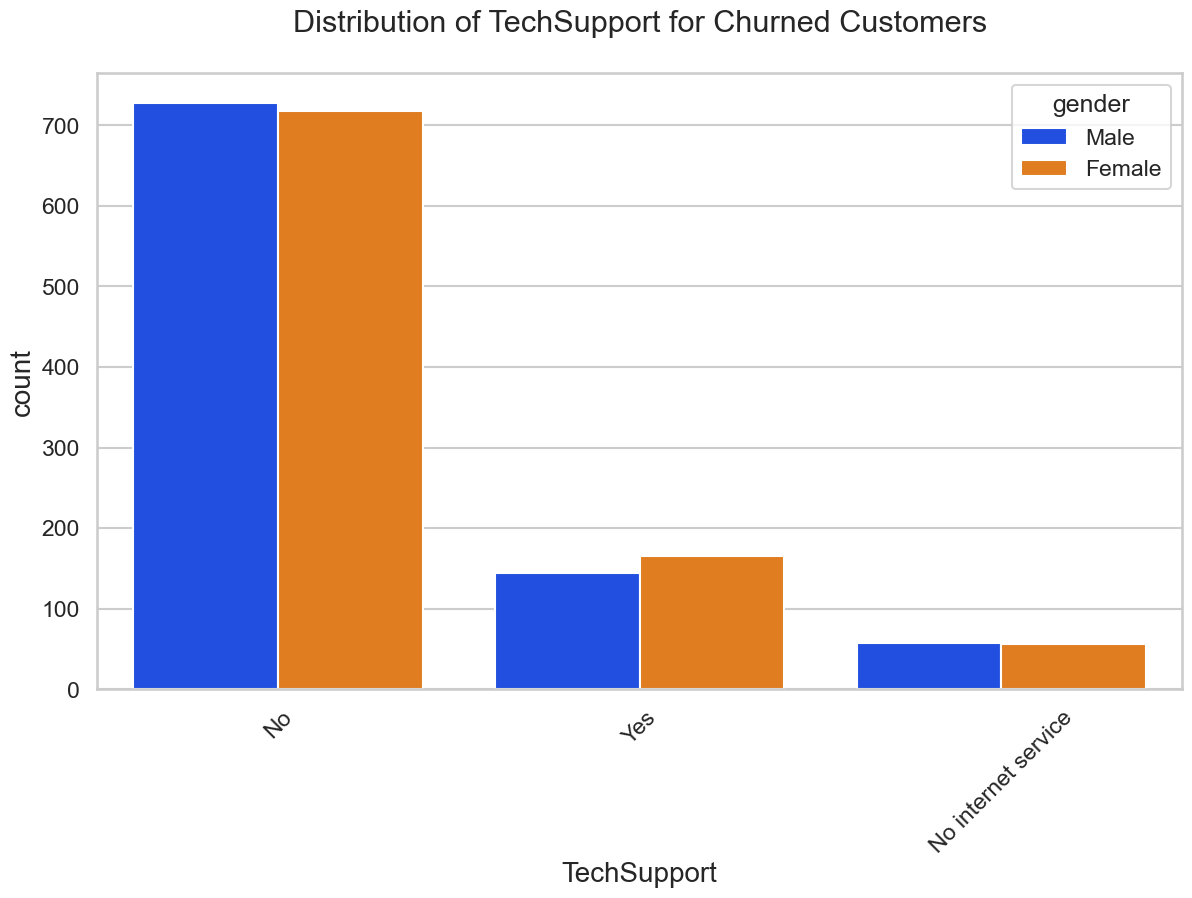

In [48]:
uniplot(new_df1,'TechSupport','Distribution of TechSupport for Churned Customers','gender')

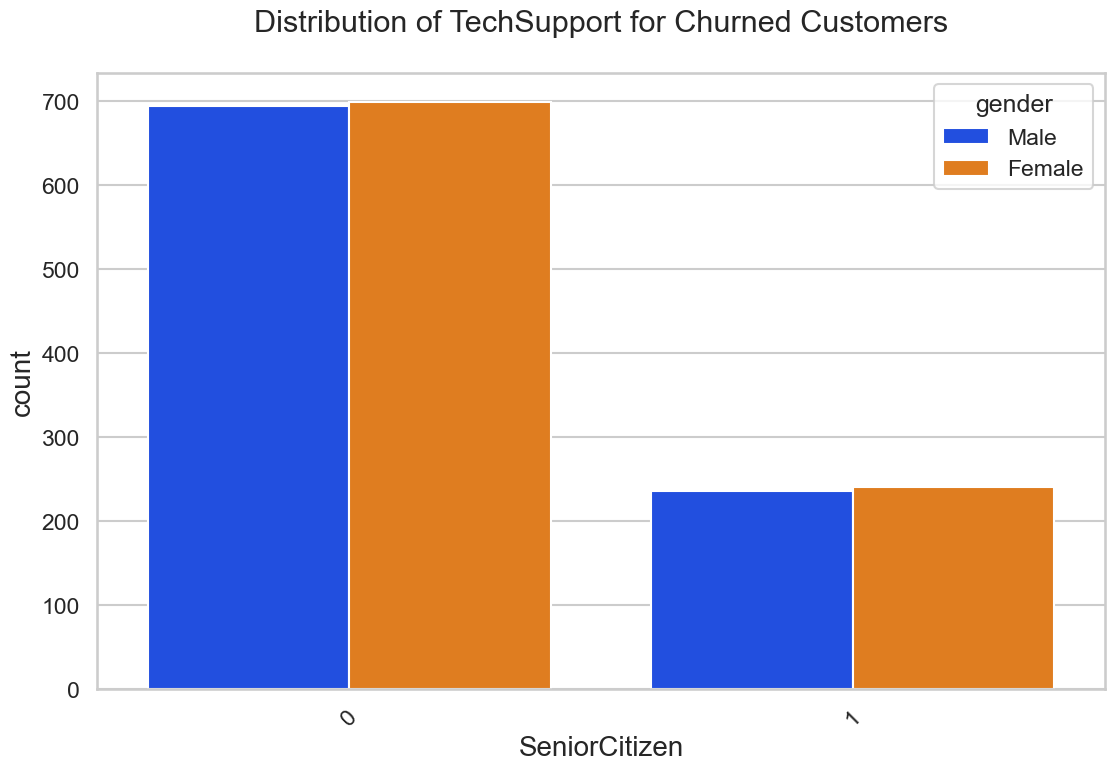

In [49]:
uniplot(new_df1,'SeniorCitizen','Distribution of TechSupport for Churned Customers','gender')

## **Conclusion**
These are some of the quick insights from this excercise.
* Electronic check medium are the highes churners
* Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to customers
* No online security , No tech support category are high churners
* Non senior Citizen are high churners 